In [8]:
from google.colab import drive

In [9]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
train_datagen = ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False,validation_split=0.2)

In [12]:
test_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [13]:
x_train=train_datagen.flow_from_directory(r"/content/drive/MyDrive/flowers",target_size=(64,64),class_mode='categorical',batch_size=100,subset = 'training')

Found 239 images belonging to 5 classes.


In [14]:
x_test=test_datagen.flow_from_directory(r"/content/drive/MyDrive/flowers",target_size=(64,64),class_mode='categorical',batch_size=100,subset = 'validation')

Found 59 images belonging to 5 classes.


In [15]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [16]:
from tensorflow.keras.models import Sequential

In [17]:
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

In [18]:
model=Sequential()

In [19]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))

In [20]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [21]:
model.add(Flatten())

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [23]:
#hidden layers
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))
model.add(Dense(75,activation='relu'))
model.add(Dense(5,activation='softmax'))#op layer

In [24]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [29]:
len(x_train)

3

In [26]:
3457/100

34.57

In [27]:
len(x_test)

1

In [30]:
model.fit(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=30)

Epoch 1/30
3/3 [==============================] - 10s 5s/step - loss: 9.8952e-07 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/30
3/3 [==============================] - 1s 408ms/step - loss: 2.0450e-08 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/30
3/3 [==============================] - 1s 548ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/30
3/3 [==============================] - 1s 543ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/30
3/3 [==============================] - 1s 549ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/30
3/3 [==============================] - 1s 547ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/30
3/3 [==============================] - 1s 577ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 

In [31]:
model.save('flowers.h5')


In [32]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [33]:
model=load_model('flowers.h5')

In [36]:
img = image.load_img(r"/content/drive/MyDrive/flowers/sunflower/145303599_2627e23815_n.jpg")

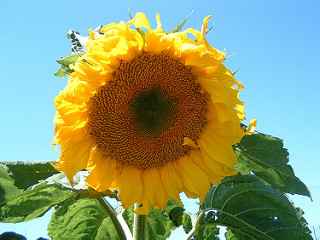

In [37]:
img

In [38]:
img = image.load_img(r"/content/drive/MyDrive/flowers/sunflower/145303599_2627e23815_n.jpg",target_size=(64,64))

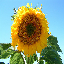

In [39]:
img

In [40]:
x=image.img_to_array(img)

In [41]:
x

array([[[137., 212., 252.],
        [134., 212., 250.],
        [139., 212., 253.],
        ...,
        [117., 186., 253.],
        [116., 185., 254.],
        [114., 184., 253.]],

       [[133., 212., 251.],
        [137., 211., 250.],
        [138., 213., 253.],
        ...,
        [116., 187., 253.],
        [116., 186., 255.],
        [114., 184., 253.]],

       [[137., 212., 252.],
        [135., 214., 253.],
        [135., 215., 252.],
        ...,
        [116., 187., 253.],
        [116., 185., 252.],
        [114., 184., 253.]],

       ...,

       [[187., 245., 247.],
        [202., 250., 255.],
        [200., 255., 255.],
        ...,
        [ 37.,  72.,  39.],
        [192., 240., 254.],
        [188., 240., 253.]],

       [[  5.,  45.,  94.],
        [ 21.,  45.,  47.],
        [ 25.,  50.,  46.],
        ...,
        [ 33.,  76.,  49.],
        [195., 237., 249.],
        [185., 233., 255.]],

       [[ 14.,  35.,  26.],
        [ 17.,  49.,  26.],
        [ 31.,  

In [42]:
x.shape

(64, 64, 3)

In [43]:
x=np.expand_dims(x,axis=0)
x.shape

(1, 64, 64, 3)

In [44]:
y=np.argmax(model.predict(x),axis=1)

In [45]:
y

array([3])

In [46]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [48]:
img = image.load_img(r"/content/drive/MyDrive/flowers/daisy/5794835_d15905c7c8_n.jpg",target_size=(64,64))
print(img)
x=image.img_to_array(img)
print(x)
x=np.expand_dims(x,axis=0)
print(x.shape)
y=np.argmax(model.predict(x),axis=1)
print(x_train.class_indices)
print(y)

<PIL.Image.Image image mode=RGB size=64x64 at 0x7FC6C90B8750>
[[[ 75.  89.  36.]
  [ 78.  93.  38.]
  [ 77.  92.  35.]
  ...
  [ 94.  95.  53.]
  [ 93.  91.  52.]
  [ 80.  91.  48.]]

 [[ 76.  91.  36.]
  [ 80.  95.  36.]
  [ 78.  93.  34.]
  ...
  [112. 105.  63.]
  [104.  99.  57.]
  [ 91.  92.  52.]]

 [[ 79.  94.  39.]
  [ 82.  97.  38.]
  [ 81.  97.  34.]
  ...
  [122. 110.  70.]
  [114. 106.  67.]
  [101.  99.  58.]]

 ...

 [[118. 119. 105.]
  [127. 121. 109.]
  [134. 128. 116.]
  ...
  [109. 129.  68.]
  [110. 127.  72.]
  [111. 123.  73.]]

 [[133. 127. 115.]
  [133. 131. 116.]
  [142. 136. 124.]
  ...
  [ 83. 104.  47.]
  [ 80. 104.  46.]
  [ 91. 103.  55.]]

 [[142. 133. 124.]
  [144. 136. 125.]
  [144. 138. 126.]
  ...
  [ 72.  93.  37.]
  [ 72.  94.  47.]
  [ 77.  90.  47.]]]
(1, 64, 64, 3)
{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}
[3]
